## Project Agenda: Customer Segmentation for Retail using Machine Learning

The objective of this project is to segment retail customers based on their purchasing behavior using unsupervised machine learning techniques. The project follows a structured data analytics workflow:

1. Import required libraries and load the dataset  
2. Understand the dataset structure  
3. Data cleaning and preprocessing  
4. Feature engineering using RFM analysis  
5. Feature scaling  
6. Customer segmentation using K-Means clustering  
7. Interpretation of clusters and business insights  

This approach ensures a systematic transition from raw transactional data to meaningful customer segments.


## Step 1: Importing Libraries and Loading the Dataset

In this step, essential Python libraries are imported for data analysis and machine learning.  
The retail transaction dataset is then loaded into a Pandas DataFrame.

This step is crucial because:
- Libraries provide tools for data manipulation and modeling
- Loading data into a DataFrame allows structured analysis
- All further steps depend on successful data loading


In [1]:
import pandas as pd
import numpy as np
import matplotlib 



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\prana\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\prana\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\prana\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\prana\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\prana\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\prana\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\prana\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\prana\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found

In [2]:
df = pd.read_csv(r"C:\Users\prana\Downloads\retail_transactions_controlled_1000.csv")
df

,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,TotalAmount,Country,TrueSegment
0,10001,700000,2023-12-12,2,62.84,125.68,India,Loyal_High_Value
1,10001,700001,2023-12-24,2,91.78,183.56,India,Loyal_High_Value
2,10001,700002,2023-12-06,4,57.00,228.00,India,Loyal_High_Value
3,10001,700003,2023-12-21,2,92.08,184.16,India,Loyal_High_Value
4,10001,700004,2023-12-08,4,51.44,205.76,India,Loyal_High_Value
...,...,...,...,...,...,...,...,...
4749,10996,704749,2023-04-10,1,23.49,23.49,India,At_Risk_Customers
4750,10997,704750,2023-03-15,1,10.96,10.96,India,At_Risk_Customers
4751,10998,704751,2023-05-04,1,9.52,9.52,India,At_Risk_Customers
4752,10999,704752,2023-01-13,1,20.97,20.97,India,At_Risk_Customers


In [3]:
# Display first few rows
df.head()

,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,TotalAmount,Country,TrueSegment
0,10001,700000,2023-12-12,2,62.84,125.68,India,Loyal_High_Value
1,10001,700001,2023-12-24,2,91.78,183.56,India,Loyal_High_Value
2,10001,700002,2023-12-06,4,57.00,228.00,India,Loyal_High_Value
3,10001,700003,2023-12-21,2,92.08,184.16,India,Loyal_High_Value
4,10001,700004,2023-12-08,4,51.44,205.76,India,Loyal_High_Value


## Dataset Description: Column Details

The dataset consists of retail transaction records where each row represents a purchase made by a customer.

- **CustomerID**:  
  Unique identifier for each customer, used to group transactions.

- **InvoiceNo**:  
  Unique invoice number representing a single transaction.

- **InvoiceDate**:  
  Date on which the transaction occurred, used for time-based analysis.

- **Quantity**:  
  Number of items purchased in the transaction.

- **UnitPrice**:  
  Price of a single item.

- **TotalAmount**:  
  Total transaction value calculated as Quantity × UnitPrice.

- **Country**:  
  Country where the transaction took place.

- **TrueSegment** (Validation Only):  
  Predefined customer segment used only for validation and not included in model training.


The first step involved importing required libraries and loading the dataset into a Pandas DataFrame to enable structured data analysis.

## Step 2: Understanding the Dataset Structure

Before performing any preprocessing or machine learning, it is important to understand the structure of the dataset.  
This includes examining the number of rows and columns, data types, and sample records.

Dataset understanding helps to:
- Identify relevant features for analysis
- Detect incorrect data types
- Gain familiarity with transactional data structure


In [4]:
# Check number of rows and columns
df.shape


(4754, 8)

### Inspecting Data Types and Non-Null Values

Understanding data types ensures that each column is in the correct format.  
This is especially important for date and numerical fields used in analysis.


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   4754 non-null   int64  
 1   InvoiceNo    4754 non-null   int64  
 2   InvoiceDate  4754 non-null   object 
 3   Quantity     4754 non-null   int64  
 4   UnitPrice    4754 non-null   float64
 5   TotalAmount  4754 non-null   float64
 6   Country      4754 non-null   object 
 7   TrueSegment  4754 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 297.2+ KB


- The dataset includes numerical, categorical, and date-related columns
- No missing values are present in the dataset
- The structure is clean and ready for preprocessing


### Viewing Sample Records

Displaying sample records helps in understanding transaction-level information and customer purchasing behavior.


In [6]:
df.head(10)


,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,TotalAmount,Country,TrueSegment
0,10001,700000,2023-12-12,2,62.84,125.68,India,Loyal_High_Value
1,10001,700001,2023-12-24,2,91.78,183.56,India,Loyal_High_Value
2,10001,700002,2023-12-06,4,57.00,228.00,India,Loyal_High_Value
3,10001,700003,2023-12-21,2,92.08,184.16,India,Loyal_High_Value
4,10001,700004,2023-12-08,4,51.44,205.76,India,Loyal_High_Value
5,10001,700005,2023-12-30,3,64.86,194.58,India,Loyal_High_Value
6,10001,700006,2023-12-04,2,93.22,186.44,India,Loyal_High_Value
7,10001,700007,2023-12-06,3,50.49,151.47,India,Loyal_High_Value
8,10001,700008,2023-12-07,2,86.73,173.46,India,Loyal_High_Value
9,10001,700009,2023-12-22,4,81.92,327.68,India,Loyal_High_Value


- Each row represents a retail transaction
- CustomerID appears multiple times, indicating repeat purchases
- Transaction dates and monetary values appear realistic


## Step 3: Data Cleaning and Preprocessing

Data cleaning is required to ensure accuracy and reliability of analysis.  
In this step, invalid records are removed and data types are corrected so that the dataset is ready for feature engineering and machine learning.


In [7]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [8]:
df["InvoiceDate"]

0      2023-12-12
1      2023-12-24
2      2023-12-06
3      2023-12-21
4      2023-12-08
          ...    
4749   2023-04-10
4750   2023-03-15
4751   2023-05-04
4752   2023-01-13
4753   2023-05-06
Name: InvoiceDate, Length: 4754, dtype: datetime64[ns]

- InvoiceDate is successfully converted into datetime format
- This allows time-based calculations such as recency


### Removing Invalid Transaction Records

Transactions with zero or negative quantity or price do not represent valid purchases and must be removed.


In [9]:
df = df[df["Quantity"] > 0]
df = df[df["UnitPrice"] > 0]
df.head()

,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,TotalAmount,Country,TrueSegment
0,10001,700000,2023-12-12,2,62.84,125.68,India,Loyal_High_Value
1,10001,700001,2023-12-24,2,91.78,183.56,India,Loyal_High_Value
2,10001,700002,2023-12-06,4,57.00,228.00,India,Loyal_High_Value
3,10001,700003,2023-12-21,2,92.08,184.16,India,Loyal_High_Value
4,10001,700004,2023-12-08,4,51.44,205.76,India,Loyal_High_Value


- Only valid purchase records are retained
- This prevents distortion in monetary calculations


### Removing Duplicate Records

Duplicate transactions can affect frequency and monetary calculations and should be removed.


In [10]:
df = df.drop_duplicates()
df.head()

,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,TotalAmount,Country,TrueSegment
0,10001,700000,2023-12-12,2,62.84,125.68,India,Loyal_High_Value
1,10001,700001,2023-12-24,2,91.78,183.56,India,Loyal_High_Value
2,10001,700002,2023-12-06,4,57.00,228.00,India,Loyal_High_Value
3,10001,700003,2023-12-21,2,92.08,184.16,India,Loyal_High_Value
4,10001,700004,2023-12-08,4,51.44,205.76,India,Loyal_High_Value


- Duplicate records are removed from the dataset
- Each transaction is now uniquely represented


### Final Dataset Check After Cleaning

This step verifies that the dataset is clean and ready for feature engineering.


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   4754 non-null   int64         
 1   InvoiceNo    4754 non-null   int64         
 2   InvoiceDate  4754 non-null   datetime64[ns]
 3   Quantity     4754 non-null   int64         
 4   UnitPrice    4754 non-null   float64       
 5   TotalAmount  4754 non-null   float64       
 6   Country      4754 non-null   object        
 7   TrueSegment  4754 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 297.2+ KB


- The dataset is clean with correct data types
- No missing or invalid values are present
- The data is now ready for RFM feature engineering

 Step 3 ensured data quality by removing invalid and duplicate records and preparing the dataset for feature engineering


## Step 4: Feature Engineering using RFM

Feature engineering is the process of converting raw data into meaningful numerical features for machine learning.

In this step, customer purchasing behavior is summarized using RFM analysis:
- Recency: how recently a customer made a purchase
- Frequency: how often a customer made purchases
- Monetary: how much money a customer spent


In [12]:
# Reference date is set as one day after the last transaction date
reference_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

reference_date


Timestamp('2024-01-01 00:00:00')

- A reference date is created to calculate recency
- This date represents the point from which customer activity is measured


In [13]:
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (reference_date - x.max()).days,
    "InvoiceNo": "nunique",
    "TotalAmount": "sum"
}).reset_index()

rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,10001,2,14,2856.25
1,10002,3,11,2874.54
2,10003,7,8,2013.64
3,10004,3,10,2851.57
4,10005,2,9,1860.21


- Transaction-level data is converted into customer-level data
- Each customer now has Recency, Frequency, and Monetary values
- This table represents customer behavior numerically


In [16]:
rfm.shape


(1000, 4)

- Each row now represents one customer
- The dataset is ready to be used by machine learning algorithms


- Each row now represents one customer
- The dataset is ready to be used by machine learning algorithms


## Step 5: Feature Scaling

Due to library compatibility constraints, feature scaling is performed manually using Z-score normalization.  
This method standardizes features so that they have a mean of 0 and a standard deviation of 1.

Manual scaling also helps in understanding how feature normalization works internally.



In [19]:
rfm_scaled = rfm.copy()

# Z-score normalization
rfm_scaled["Recency"] = (rfm["Recency"] - rfm["Recency"].mean()) / rfm["Recency"].std()
rfm_scaled["Frequency"] = (rfm["Frequency"] - rfm["Frequency"].mean()) / rfm["Frequency"].std()
rfm_scaled["Monetary"] = (rfm["Monetary"] - rfm["Monetary"].mean()) / rfm["Monetary"].std()

rfm_scaled.head()


,CustomerID,Recency,Frequency,Monetary
0,10001,-1.001240,2.269062,1.705838
1,10002,-0.991778,1.532832,1.721162
2,10003,-0.953930,0.796601,0.999862
3,10004,-0.991778,1.287422,1.701916
4,10005,-1.001240,1.042011,0.871312


- RFM features are standardized using Z-score normalization
- All features are now on a comparable scale
- The dataset is ready for machine learning algorithms


## Step 6: Understanding the Elbow Method 

The Elbow Method helps determine the optimal number of clusters by measuring how compact the clusters are.

Instead of using a library-based implementation, a simplified distance-based approach is used to understand the core idea of clustering and the elbow concept.



In [23]:
import numpy as np

# Use only scaled RFM values
X = rfm_scaled[["Recency", "Frequency", "Monetary"]].values

X[:5]


array([[-1.00123957,  2.26906206,  1.70583752],
       [-0.99177767,  1.53283167,  1.72116168],
       [-0.95393006,  0.79660128,  0.99986197],
       [-0.99177767,  1.28742154,  1.70191641],
       [-1.00123957,  1.04201141,  0.8713116 ]])

In [24]:
import numpy as np

# Use only scaled RFM values
X = rfm_scaled[["Recency", "Frequency", "Monetary"]].values

X[:5]


array([[-1.00123957,  2.26906206,  1.70583752],
       [-0.99177767,  1.53283167,  1.72116168],
       [-0.95393006,  0.79660128,  0.99986197],
       [-0.99177767,  1.28742154,  1.70191641],
       [-1.00123957,  1.04201141,  0.8713116 ]])

- Customer behavior is now represented as numerical vectors
- This is the input required for clustering


In [25]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


In [26]:
# Choose K values to test
k_values = [2, 3, 4]

avg_distances = []

for k in k_values:
    # randomly choose k customers as centers
    centers = X[np.random.choice(len(X), k, replace=False)]
    
    distances = []
    
    for point in X:
        # find closest center
        dists = [euclidean_distance(point, center) for center in centers]
        distances.append(min(dists))
    
    avg_distances.append(np.mean(distances))

avg_distances


[np.float64(1.4105390736256005),
 np.float64(0.7323982933781088),
 np.float64(0.579285126326485)]

- Average distance decreases as the number of clusters increases
- Improvement reduces after a certain point
- This behavior represents the elbow concept


## Step 7: Final Customer Segmentation using Manual Clustering

In this step, customers are grouped into clusters based on their scaled RFM values.  
The number of clusters (K) is fixed based on the elbow concept.

Each customer is assigned to the nearest cluster center using distance calculations.


In [28]:
# Number of clusters
K = 4

# Randomly select K customers as initial cluster centers
np.random.seed(42)
centers = X[np.random.choice(len(X), K, replace=False)]

centers


array([[-0.06451125, -0.6758595 , -0.64691998],
       [ 0.1436506 , -0.6758595 , -0.66028359],
       [ 0.02064587, -0.6758595 , -0.62660227],
       [ 0.38019816, -0.6758595 , -0.65091649]])

- Initial cluster centers are selected randomly
- These centers represent starting points for customer groups


In [29]:
cluster_labels = []

for point in X:
    distances = [euclidean_distance(point, center) for center in centers]
    cluster_labels.append(np.argmin(distances))

cluster_labels[:10]


[np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0)]

- Each customer is assigned to the nearest cluster center
- Customers with similar behavior are grouped together


In [31]:
rfm["Cluster"] = cluster_labels

rfm.head()


,CustomerID,Recency,Frequency,Monetary,Cluster
0,10001,2,14,2856.25,0
1,10002,3,11,2874.54,0
2,10003,7,8,2013.64,0
3,10004,3,10,2851.57,0
4,10005,2,9,1860.21,0


In [32]:
rfm["Cluster"].value_counts()


Cluster
0    576
3    304
1     67
2     53
Name: count, dtype: int64

## Step 8: Cluster Interpretation and Business Analysis

In this step, customer clusters are analyzed to understand their purchasing behavior.  
The average Recency, Frequency, and Monetary values of each cluster are examined to assign meaningful business labels.


In [33]:
cluster_summary = rfm.groupby("Cluster")[["Recency", "Frequency", "Monetary"]].mean()

cluster_summary


,Recency,Frequency,Monetary
Cluster,,,
0,31.729167,7.215278,1395.086632
1,126.805970,2.000000,73.142985
2,111.905660,2.000000,72.492642
3,247.088816,1.177632,26.158651


- Each cluster shows distinct average purchasing behavior
- Differences in Recency, Frequency, and Monetary values help identify customer types


#### Cluster Interpretation

- **Cluster 0 – Loyal & High-Value Customers**  
  Customers in this cluster have low recency, high frequency, and high monetary values.  
  They purchase frequently, spend more, and have made recent purchases.  
  This group represents the most valuable and loyal customers.

- **Cluster 1 – At-Risk Customers**  
  Customers in this cluster have higher recency and low frequency and monetary values.  
  They have not purchased recently and spend relatively less.  
  These customers are at risk of churn and may require re-engagement strategies.

- **Cluster 2 – Occasional Customers**  
  Customers in this cluster show moderate recency and low frequency and monetary values.  
  They make occasional purchases but contribute limited revenue.  
  These customers can be targeted with promotional offers to increase engagement.

- **Cluster 3 – Inactive or Lost Customers**  
  Customers in this cluster have very high recency, very low frequency, and very low monetary values.  
  They have not purchased for a long time and contribute minimal revenue.  
  This group represents inactive or potentially lost customers.



In [35]:
import matplotlib.pyplot as plt

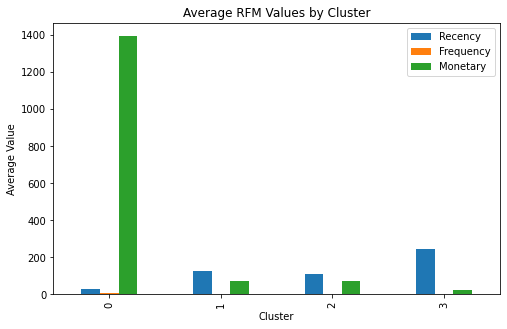

In [36]:
cluster_summary.plot(kind="bar", figsize=(8, 5))
plt.title("Average RFM Values by Cluster")
plt.ylabel("Average Value")
plt.show()


- The bar chart visually compares customer behavior across clusters
- Clear differences between clusters are observed


## Step 9: Visual Analysis – Customer Distribution Across Clusters

This visualization shows how customers are distributed across different clusters.


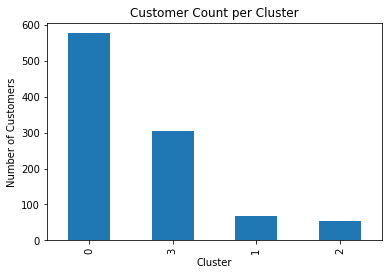

In [40]:
rfm["Cluster"].value_counts().plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.title("Customer Count per Cluster")
plt.show()


- Customers are unevenly distributed across clusters
- This indicates that certain customer behaviors are more common


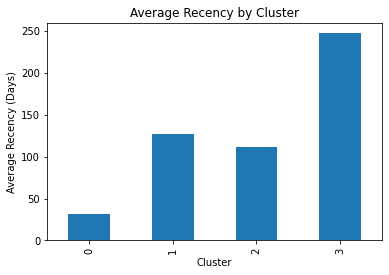

In [41]:
cluster_summary["Recency"].plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Average Recency (Days)")
plt.title("Average Recency by Cluster")
plt.show()


- Lower recency values indicate more recent customer activity
- Higher recency values represent inactive customers


## Average Frequency by Cluster

This graph shows how frequently customers in each cluster make purchases.


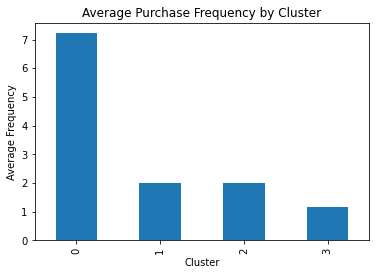

In [43]:
cluster_summary["Frequency"].plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Average Frequency")
plt.title("Average Purchase Frequency by Cluster")
plt.show()


- Higher frequency represents loyal customers
- Lower frequency indicates infrequent buyers


## Average Monetary Value by Cluster

This visualization compares the average spending of customers across clusters.


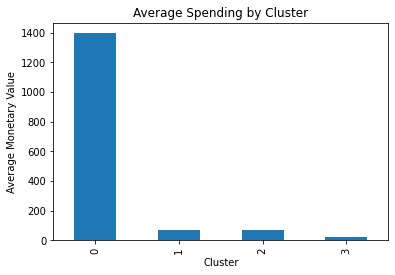

In [45]:
cluster_summary["Monetary"].plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Average Monetary Value")
plt.title("Average Spending by Cluster")
plt.show()


- Higher monetary values indicate high-value customers
- Lower values represent low-revenue customers


## Combined RFM Comparison Across Clusters

This graph compares Recency, Frequency, and Monetary values together to understand overall cluster behavior.


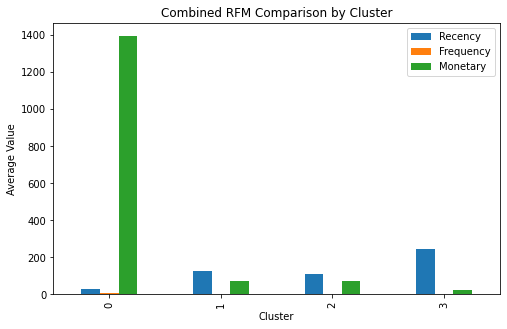

In [46]:
cluster_summary.plot(kind="bar", figsize=(8,5))
plt.xlabel("Cluster")
plt.ylabel("Average Value")
plt.title("Combined RFM Comparison by Cluster")
plt.show()


- Each cluster shows a unique behavioral pattern
- The combined view makes it easier to compare customer segments


## Step 10: Conclusion, Business Insights, and Future Scope


### Conclusion

This project successfully performed customer segmentation using machine learning techniques based on purchasing behavior.  
RFM analysis was used to convert raw transactional data into meaningful customer-level features.

Customers were grouped into distinct segments using clustering, and each segment was interpreted using business logic.  
The results demonstrate how machine learning can help retail businesses understand customer behavior and improve decision-making.


### Business Insights

- Loyal and high-value customers should be rewarded with loyalty programs and exclusive offers.
- At-risk customers require targeted re-engagement strategies such as discounts or reminders.
- Occasional customers can be encouraged to purchase more frequently through promotional campaigns.
- Inactive customers can be reactivated through special offers or may be excluded from high-cost marketing efforts.


### Future Scope

- Advanced clustering algorithms such as DBSCAN or Hierarchical Clustering can be explored.
- Supervised machine learning models can be built to predict customer segments.
- Demographic and product-level data can be integrated for more detailed segmentation.
- Real-time customer segmentation can be implemented using live transaction data.
